In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import PIL
import plotly
import plotly.express as px

from keras.layers import Conv2D, Activation, GlobalAvgPool2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.models import Sequential

from keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os
import cv2
import numpy as np

# Define the directory containing your image data
data_directory = '/content/drive/MyDrive/gaussian_filtered_images'

# Function to load images and extract labels
def load_images_and_labels(directory):
    images = []
    labels = []
    class_names = os.listdir(directory)
    for class_name in class_names:
        class_directory = os.path.join(directory, class_name)
        if os.path.isdir(class_directory):
            for filename in os.listdir(class_directory):
                image_path = os.path.join(class_directory, filename)
                # Load the image using OpenCV
                image = cv2.imread(image_path)
                # Optionally, you may preprocess the image here (e.g., resize, normalize)
                if image is not None:
                    images.append(image)
                    labels.append(class_name)
    return images, labels

# Load images and labels
images, labels = load_images_and_labels(data_directory)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Verify the number of samples and unique classes
print("Number of samples:", len(images))
print("Unique classes:", np.unique(labels))

Number of samples: 3672
Unique classes: ['Mild' 'Moderate' 'No_DR' 'Proliferate_DR' 'Severe']


In [ ]:
pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 2.1 MB/s eta 0:00:00


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Determine the class counts
class_counts = Counter(labels)

# Flatten the images array to be compatible with oversampling
flattened_images = images.reshape(-1, images.shape[1] * images.shape[2] * images.shape[3])

# Initialize RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Resample the dataset to balance the classes
images_resampled, labels_resampled = oversampler.fit_resample(flattened_images, labels)

# Verify the class distribution after oversampling
print("Class Counts after Oversampling:", Counter(labels_resampled))

Class Counts after Oversampling: Counter({'No_DR': 1805, 'Severe': 1805, 'Proliferate_DR': 1805, 'Moderate': 1805, 'Mild': 1805})


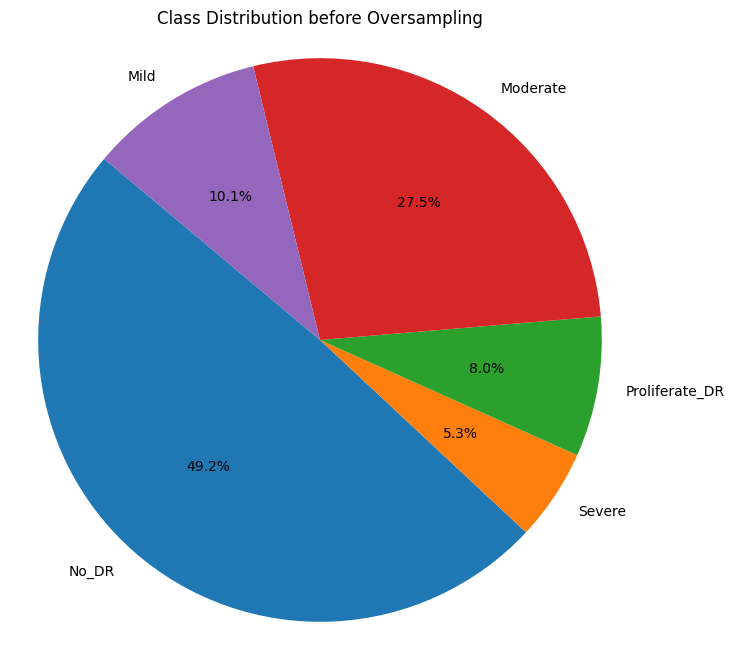

In [ ]:
import matplotlib.pyplot as plt

# Class names and counts after oversampling
class_names = list(class_counts.keys())
class_counts_resampled = Counter(labels_resampled)
class_counts_values = list(class_counts.values())

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts_values, labels=class_names, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution before Oversampling')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

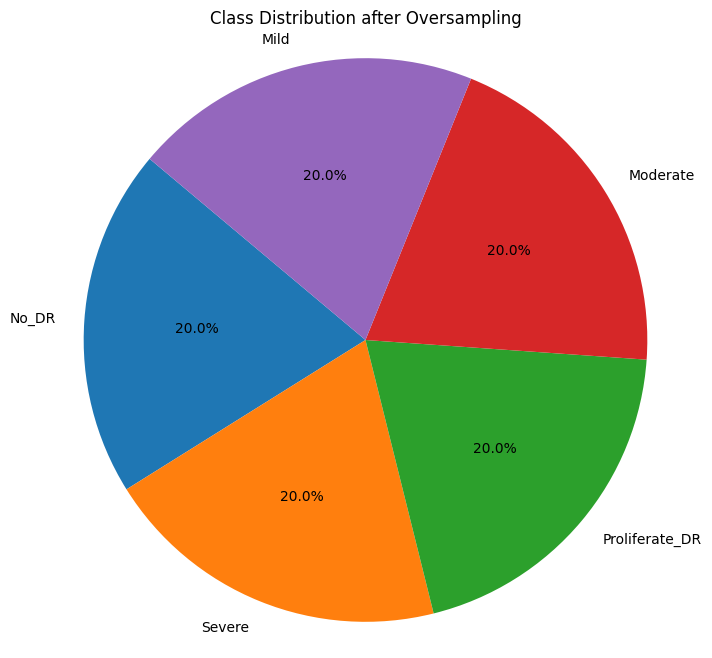

In [ ]:
import matplotlib.pyplot as plt

# Determine the class counts after oversampling
class_counts_resampled = Counter(labels_resampled)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts_resampled.values(), labels=class_counts_resampled.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution after Oversampling')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
import os
import cv2
import numpy as np

# Define a function to preprocess images
def preprocess_image(image_path, target_size=(384, 384)):
    # Read the image
    image = cv2.imread(image_path)

    # Resize the image
    image = cv2.resize(image, target_size)

    # Convert to RGB format
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Normalize pixel values
    image = image / 255.0

    return image

# Define the path to the folder containing the subfolders
data_folder = '/content/drive/MyDrive/gaussian_filtered_images'

# Initialize lists to store images and labels
images = []
labels = []

# Loop through each subfolder
for label in os.listdir(data_folder):
    label_folder = os.path.join(data_folder, label)

    # Check if the item is a directory
    if os.path.isdir(label_folder):
        # Loop through each image in the subfolder
        for filename in os.listdir(label_folder):
            image_path = os.path.join(label_folder, filename)

            # Preprocess the image
            preprocessed_image = preprocess_image(image_path)

            # Append the preprocessed image to the images list
            images.append(preprocessed_image)

            # Append the label to the labels list
            labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Print the shape of the dataset
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)

Images shape: (3672, 384, 384, 3)
Labels shape: (3672,)


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(384, 384, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')  # Assuming 5 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=10, validation_data=(X_test, y_test_encoded))

Epoch 1/10
92/92 [==============================] - 137s 1s/step - loss: 1.1292 - accuracy: 0.6578 - val_loss: 0.7661 - val_accuracy: 0.7197
Epoch 2/10
92/92 [==============================] - 133s 1s/step - loss: 0.7790 - accuracy: 0.7034 - val_loss: 0.7132 - val_accuracy: 0.7347
Epoch 3/10
92/92 [==============================] - 134s 1s/step - loss: 0.7455 - accuracy: 0.7205 - val_loss: 0.6920 - val_accuracy: 0.7565
Epoch 4/10
92/92 [==============================] - 135s 1s/step - loss: 0.6941 - accuracy: 0.7416 - val_loss: 0.7867 - val_accuracy: 0.7075
Epoch 5/10
92/92 [==============================] - 135s 1s/step - loss: 0.6563 - accuracy: 0.7542 - val_loss: 0.8925 - val_accuracy: 0.6871
Epoch 6/10
92/92 [==============================] - 135s 1s/step - loss: 0.5920 - accuracy: 0.7739 - val_loss: 0.7478 - val_accuracy: 0.7551
Epoch 7/10
92/92 [==============================] - 135s 1s/step - loss: 0.4945 - accuracy: 0.8185 - val_loss: 0.7147 - val_accuracy: 0.7769
Epoch 8/10
92

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test data
predictions = model.predict(X_test)

# Convert predictions to categorical labels
y_pred = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)

# Calculate precision
precision = precision_score(y_test_encoded, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test_encoded, y_pred, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test_encoded, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

23/23 [==============================] - 6s 248ms/step
Accuracy: 0.7319727891156462
Precision: 0.70822345514256
Recall: 0.7319727891156462
F1-score: 0.7183112170131053


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
